In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import probplot
from sklearn import preprocessing 
import statsmodels.api as sm 

In [3]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Histogram

Text(0.5, 1.0, 'Delivery time')

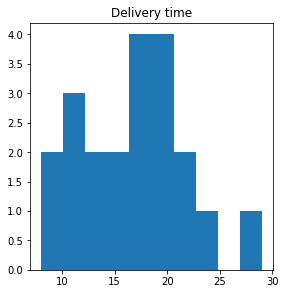

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df["Delivery Time"],density=False)
plt.title("Delivery time")


Text(0.5, 1.0, 'Sorting Time')

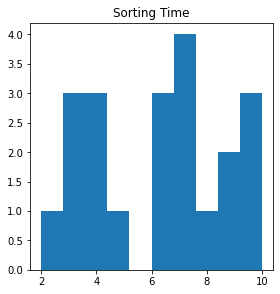

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df["Sorting Time"],density=False)
plt.title("Sorting Time")


## Distplot

C:\Users\ROHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Delivery Time')

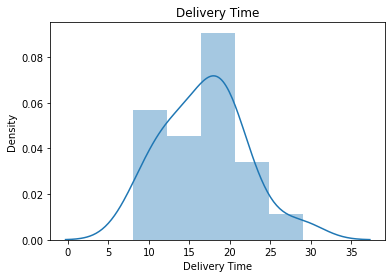

In [22]:
plt.subplot()
sns.distplot(df["Delivery Time"],kde=True)
plt.title("Delivery Time")

C:\Users\ROHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sorting Time')

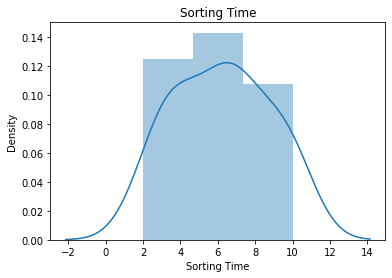

In [23]:
plt.subplot()
sns.distplot(df["Sorting Time"],kde=True)
plt.title("Sorting Time")

## Violin Plot

C:\Users\ROHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Deivery Time')

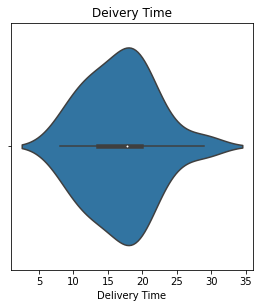

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,3)
sns.violinplot(df["Delivery Time"])
plt.title("Deivery Time")

C:\Users\ROHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sorting Time')

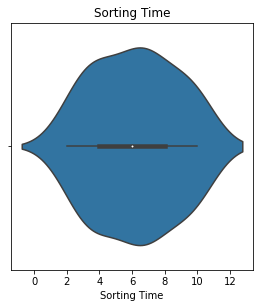

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,3)
sns.violinplot(df["Sorting Time"])
plt.title("Sorting Time")

## Probplot

Text(0.5, 1.0, 'Delivery Time')

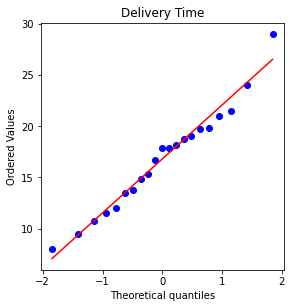

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,4)
probplot(df["Delivery Time"],plot=plt)
plt.title("Delivery Time")

Text(0.5, 1.0, 'Sorting Time')

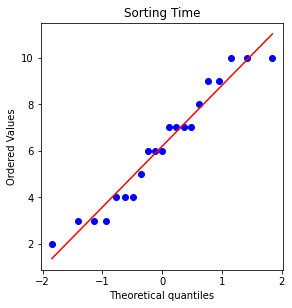

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,4)
probplot(df["Sorting Time"],plot=plt)
plt.title("Sorting Time")

from above graphs we can tell there is no outlier in data but the delivery time is not normally distrubuted but in order to check it we can perform the Shapiro Test

## Hypothesis Testing

In [40]:
Ho="Data Is Norma"
Ha="Data Is not Normal"

In [42]:
alpha=0.05
def normality_check(df):
    for columnName,columnData in df.iteritems():
        print("Shapiro Test for{columnName}".format(columnName=columnName))
        res=stats.shapiro(columnData)
        print(res)
        
        pValue=round(res[1],2)
        
        if pValue >alpha:
            print("pValue={pValue}>{alpha}. we Failed to reject the Null Hypothesis. {Ho}".format(pValue=pValue,alpha=alpha,Ho=Ho))
        else:
            print("pValue={pValue}<{alpha}. we  reject the Null Hypothesis. {Ha}".format(pValue=pValue,alpha=alpha,Ha=Ha))

normality_check(df)           

Shapiro Test forDelivery Time
ShapiroResult(statistic=0.9781284928321838, pvalue=0.8963273763656616)
pValue=0.9>0.05. we Failed to reject the Null Hypothesis. Data Is Norma
Shapiro Test forSorting Time
ShapiroResult(statistic=0.9367821216583252, pvalue=0.1881045252084732)
pValue=0.19>0.05. we Failed to reject the Null Hypothesis. Data Is Norma


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_16560\2260223600.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for columnName,columnData in df.iteritems():


# Line Plot

Text(0.5, 1.0, 'Line Plot')

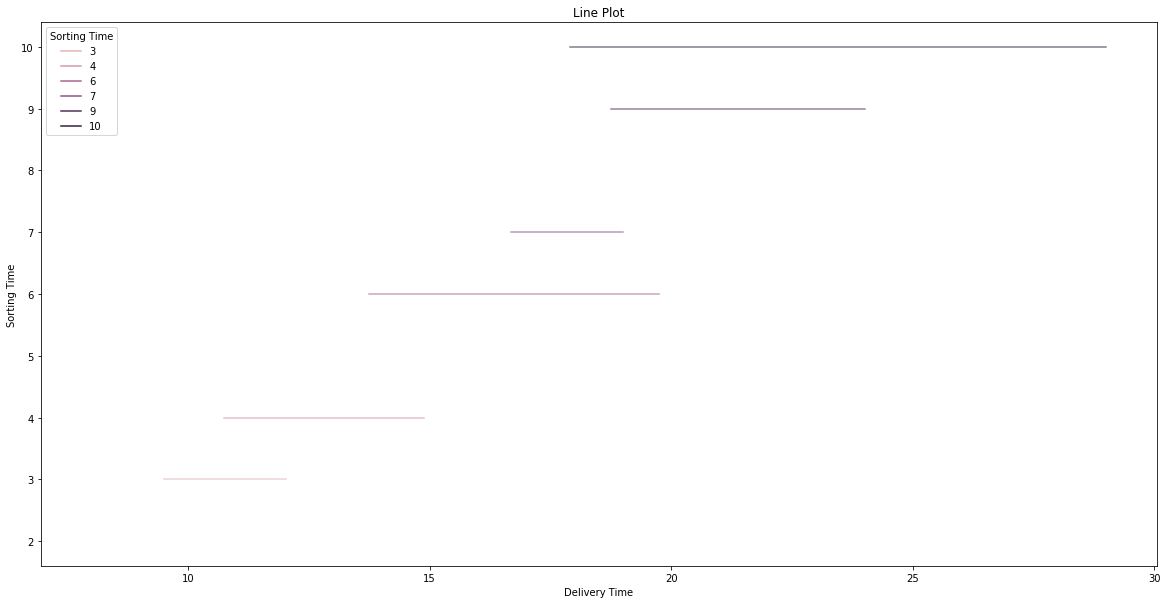

In [43]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="Delivery Time",y="Sorting Time",hue="Sorting Time",alpha=0.6)
plt.title("Line Plot")

## Heat Map

Text(0.5, 1.0, 'Heat_Map')

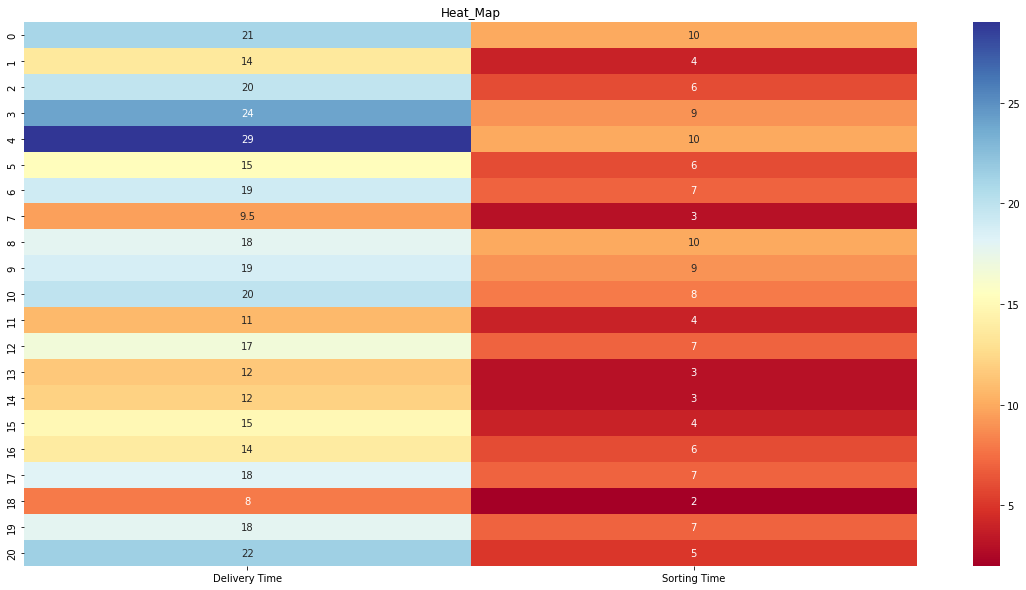

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df,cmap="RdYlBu",annot=True)
plt.title("Heat_Map")

<AxesSubplot:>

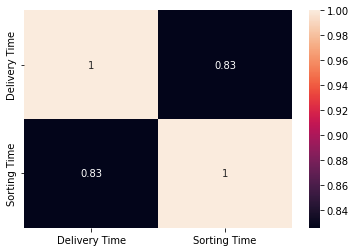

In [46]:
sns.heatmap(df.corr(),annot=True)

medium low positive correlation

## Normalization

In [54]:
df["Delivery Time"]=preprocessing.normalize(df[["Delivery Time"]],axis=0)
df["Sorting Tiime"]=preprocessing.normalize(df[["Sorting Time"]],axis=0)
df.head()

,Delivery Time,Sorting Time,Sorting Tiime
0,0.261770,10,0.327210
1,0.168281,4,0.130884
2,0.246188,6,0.196326
3,0.299166,9,0.294489
4,0.361492,10,0.327210


## SLR by 

In [78]:

def OLS_model(df):
    
    x = df.iloc[:, 1:2]
    y = df.iloc[:, 0:1] 
    
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
   
    results = model.fit()
    print('n'+"Confidence interval:"+'n', results.conf_int(alpha=0.05, cols=None)) 
    print('n'"Model parameters:"+'n',results.params)
    
    print(results.summary())
    

OLS_model(df[['Delivery Time', 'Sorting Time']])


nConfidence interval:n                      0         1
const         0.037136  0.126975
Sorting Time  0.013820  0.027291
nModel parameters:n const           0.082055
Sorting Time    0.020555
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        12:00:51   Log-Likelihood:                 40.724
No. Observations:                  21   AIC:                            -77.45
Df Residuals:                      19   BIC:                            -75.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
   

## Linear Regression Via statsmodel.formula.api (SMF)

In [88]:
df.rename(columns={"Delivery Time":"DT","Sorting Time":"ST"},inplace=True)
df

,DT,ST,Sorting Tiime
0,0.261770,10,0.327210
1,0.168281,4,0.130884
2,0.246188,6,0.196326
3,0.299166,9,0.294489
4,0.361492,10,0.327210
5,0.191341,6,0.196326
6,0.236839,7,0.229047
7,0.118420,3,0.098163
8,0.223128,10,0.327210
9,0.233723,9,0.294489


    ST
0   10
1    4
2    6
3    9
4   10
5    6
6    7
7    3
8   10
9    9
10   8
11   4
12   7
13   3
14   3
15   4
16   6
17   7
18   2
19   7
20   5           DT
0   0.261770
1   0.168281
2   0.246188
3   0.299166
4   0.361492
5   0.191341
6   0.236839
7   0.118420
8   0.223128
9   0.233723
10  0.247186
11  0.134001
12  0.207920
13  0.143350
14  0.149957
15  0.185483
16  0.171397
17  0.225745
18  0.099722
19  0.222255
20  0.268003
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        12:15:23   Log-Likelihood:                 40.724
No. Observations:                  21   AIC:                            -77.45
Df Resi

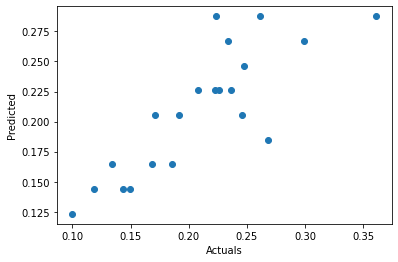

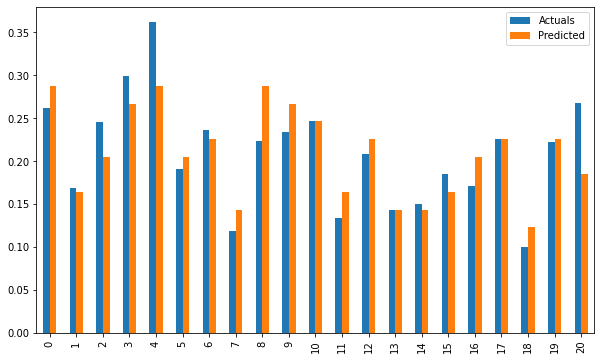

In [89]:
def smf_ols(df):
    
    x=df.iloc[:,1:2]
    y=df.iloc[:,0:1]
    
    print(x,y)
    
    model=smf.ols('y~x',data=df).fit()
    print(model.summary())
    
    y_pred=model.predict(x)
    print(y,y_pred)
    
    y_lst=y.DT.values.tolist()
    y_pred_lst=y_pred.tolist()
    print(y_lst)
        
    data=[y_lst,y_pred_lst]
    print(data)
    
    res=pd.DataFrame({'Actuals':data[0],"Predicted":data[1]})
    print(res)
    
    plt.scatter(x=res['Actuals'],y=res['Predicted'])
    plt.ylabel('Predicted')
    plt.xlabel('Actuals')
    
    res.plot(kind="bar",figsize=(10,6))

smf_ols(df[["DT","ST"]])